<a href="https://colab.research.google.com/github/Dogyun-Kim57/AI_26/blob/main/04_01_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 쇼핑모렝서는 럭키백을 판매하기로 하였다.
# 럭키팩에는 생선이 들어 있는데 종류가 7가지로 랜덤하게 들어 있다.
# 럭키팩에 확률을 표시하는것이 이번 과제 ( 들어있는 7가지의 생선의 확률이 필요함 )

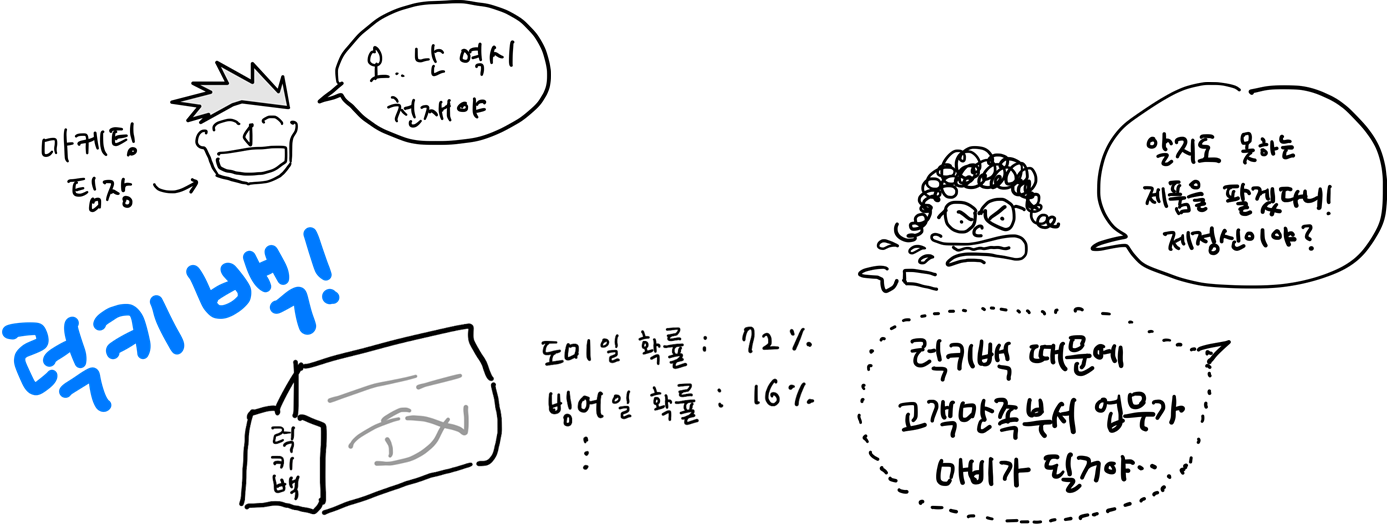

In [ ]:
# 럭키백의 확률 : 생선이 7마리라고 가정함
# 생선의 크기, 무게 (길이, 높이 , 두꼐 , 대각선의 길이 , 무게)

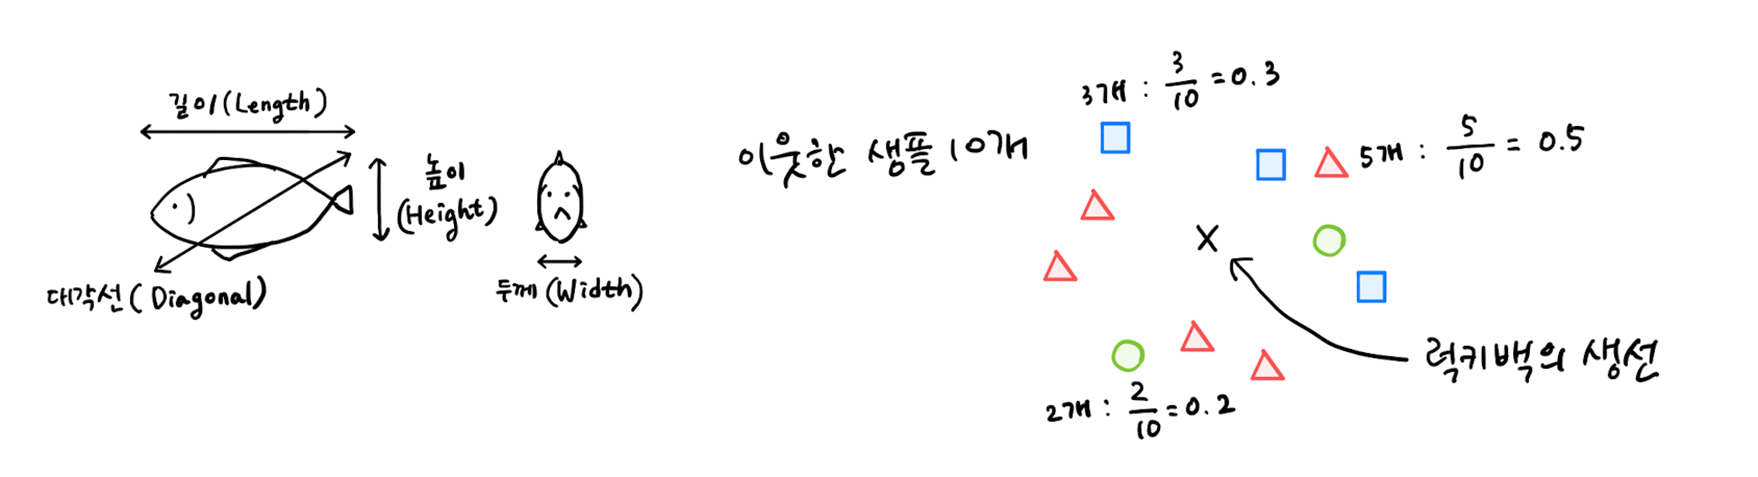

In [ ]:
# k- 최근접 알고리즘을 이용해보면 회귀로 해야할까? 분류로 해야할까?
# 생선이 들어있는 확률을 알고 싶은 것이기 때문에 회귀를 사용해보자.

# 샘플 10개중에 농어가 3개면? 3 / 10 = 0.3 (30%)
# 빙어가 5개면? 5 / 10 = 0.5 (50%)
# 도미가 2개면? 2/ 10 = 0.2 (20%)
# 총합 100%

# 사이킷 런의 k- 최근접 이웃 분리기도 이와 동일한 방식으로 확률 계산도 해줌

# 샘플 데이터 준비
# 로지스틱 회귀 : 럭키백 확률

import pandas as pd             # 판다스를 이용하여 csv를 처리함


# k-최근접 알고리즘을 이용해보면 회귀? 분류?
# 확률을 알고 싶은 것이기 때문에 회귀를 사용해보자!!!

# 샘플 10개중에 농어가 3개면 ?  3 / 10 = 0.3
# 빙어가 5개면 ?  5 / 10 = 0.5
# 도미가 2개면 ?  2 / 10 = 0.2 = 100%

# 사이킷런의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확율 계산도 해줌

# 샘플데이터 준비
# 로지스틱 회귀 : 럭키백 확율
import pandas as pd # 판다스로 csv를 처리함

fish = pd.read_csv('https://bit.ly/fish_csv_data') # 웹에 있는 파일을 가져옴
fish.head()             # 제일 위쪽 데이터 5개를 보여줌
# 어종(스피시즈) , 무게 , 길이 , 대각선 , 높이 , 너비(두께) 순으로 보여줌


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# < 패키지 어종 리스트 >
# Bream : 브림(도미)
# Roach : 로치(유럽 잉어과 민물고기)
# Whitefish : 흰살송어(화이트피시)
# Parkki : 파르키 (핀란드산 붕어과 어종)
# Perch : 농어 (정확히는 유럽농어, 퍼치)
# Pike : 강꼬치고기(파이크)
# Smelt : 빙어
# 7개의 종류의 어종이 분포되어 있음

In [5]:
# 분석용 입력 리스트값을 생성한다.
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 필드를 넣어 필터링 한다.
print(fish_input[:5])  # 앞에서 부터 5개만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
# fish[['Species']] 이렇게 하면 2차원 배열됨(금지) -> 정답파일은 1차원으로
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


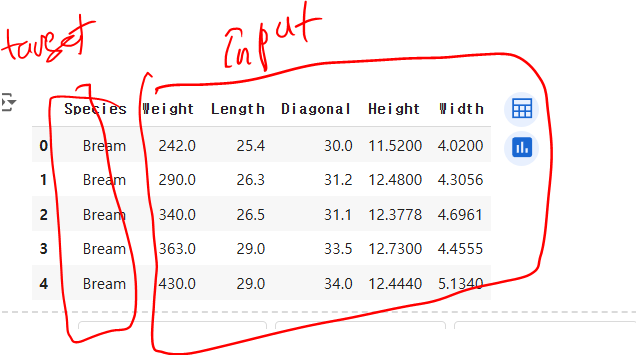

In [8]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# fish_input ['Weight','Length','Diagonal','Height','Width'] 2차원배열
# fish_target ['Species'] 1차원배열

print(train_input.shape, test_input.shape)

# 훈련용 199개와 5개의 특성
# 테스트용 40개와 5개의 특성


(119, 5) (40, 5)


In [ ]:
from sklearn.preprocessing import StandardScaler
# 표준점수 데이터의 범위(스케일조정) = (값-평균) / 표준편차
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

In [13]:
# k- 최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier         # 일단은 분류용으로 먼저

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [14]:
# 전에는 0과 1을 찾는 2진 분류였지만 지금은 타겟 7개에 어종을 넣은 상태
print(kn.classes_)
# 7개의 생선 종류가 들어있다.
# 2개 이상 클래스가 포함된 문제를 다중 분류라고 한다. ( 3개 이상 부터 )
# 주의사항 : 클래스의 순서가 인덱스로 되어 있으며 이것이 '오름차순' 형태로 보인다. ( a~b~c )

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [18]:
print(kn.predict(test_scaled[:5]))            # 테스트용의 0~4번 인덱스 까지 보자
# 처음 5개의 샘플 타깃값 예측을 해보면 아래와 같다.

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [19]:
print(test_scaled[:5])

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [ ]:
import numpy as np             # '특성'의 확률을 보기 위해서 변환

# 사이킷런이 번거로운 연산 과정을 직접 수행해줌으로써 쉽게 결과가 나옴
proba = kn.predict_proba(test_scaled[:5])
# 각 클래스에 속할 "확률(Probability)"을 반환하는 함수 predict_proba() Probability 의 약어

print(np.round(proba, decimals=4))
# 소수점 네번째 자리까지 표시(다섯번째에서 반올림)
# Bream Parkki Perch  Pike  Roach  Smelt  Whitefish' 이순서
# [[0.     0.     1.     0.     0.     0.     0.    ]
#  [0.     0.     0.     0.     0.     1.     0.    ]
#  [0.     0.     0.     1.     0.     0.     0.    ]
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

In [ ]:
# ['Perch'  100%
#  'Smelt'  100%
#  'Pike'   100%
#  'Perch'  66.66%
#  'Perch'  66.66% ] 3개의 이웃에 대한 분류 결과를 확인할 수 있다.

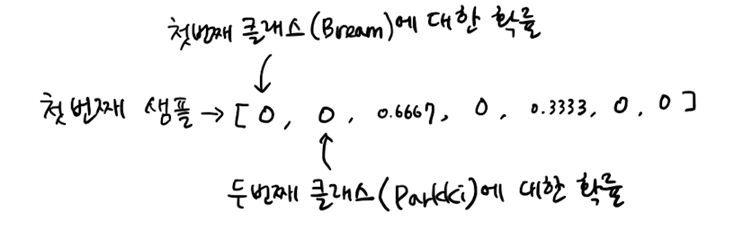

In [22]:
# 이 모델이 계산한 확률이 가장 까운 이웃의 비율이 맞는지에 대한 확인이 필요함
distance, indexes = kn.kneighbors(test_scaled[3:4])    # 4번째 값을 자세히 보자

print(train_target[indexes])

#                 Perch         Roach
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3 , Roach 1/3 이기 때문에 7개를 확율로 제공되지 못함
# 이유 : n_neighbors=3으로 했기 때문에

# kneighbors는 더미데이터보다 더 높은 값이 들어올때 문제가 생긴다.

[['Roach' 'Perch' 'Perch']]


In [ ]:
# 그렇기 때문에 알고리즘을 변경할 필요가 있다.
# 알고리즘을 로지스틱 회귀(LogisticRegression)로 변경해 보자
# 로지스틱 회귀는 이름이 회귀이지만, 분류 모델에 해당함

# 선형회귀와 동일하게 선형 방정식을 학습한다.
# z = a*(weight) + b*(length) + c*(Diagonal) + d*(Height) + e*(width) + f
# a,b,c,d,e,f는 각 항목에 대한 가중치(중여도, 계수) 임
# z는 어떤 값도 가능함! 하지만 확률이 되려면 0 ~ 1 ( 0% ~ 100% ) 사이의 값을 입력해야함
# z가 아주 큰 음수일때는 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수나 로지스틱 함

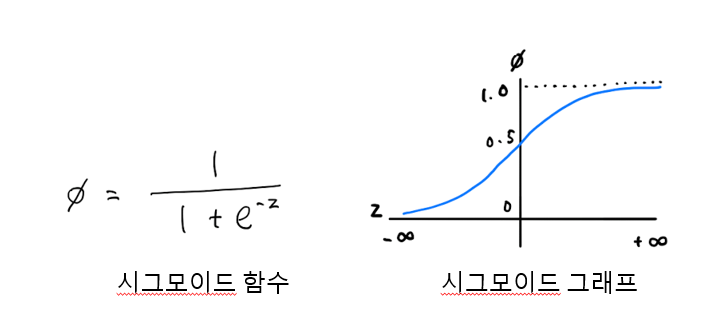

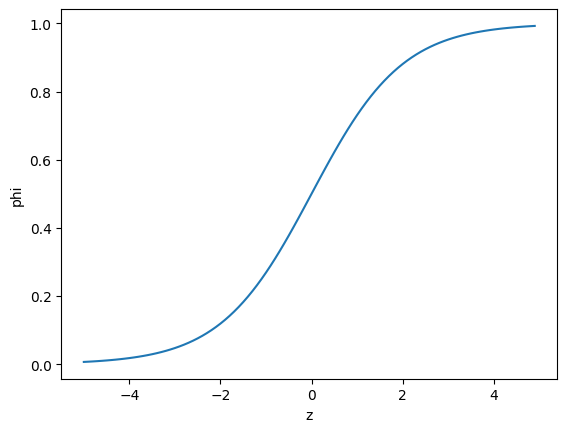

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용 : z가 무한하게 큰 음수일 경우 0에 가까워짐
# z가 무한하게 큰 양수일 경우 1에 가까워짐

z = np.arange(-5, 5, 0.1)       # -5 ~ 5 까지 0.1 간격으로 배열을 생성
phi = 1 / (1 +np.exp(-z))       # np.exp() 함수로 시그모이드 공식 암기

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
# 선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
# 이렇게 하면 0 ~ 1 사이 값을 0 ~ 100% 확률로 해석할 수 있다.

# 훈련전에 2진 분류부터 알아보자.
# 2진 분류인 경우에는 시그모이드 함수 출력이 0.5보다 크면 양성, 0.5보다 작으면 음성으로 판단
# 단, 0.5가 나오면 라이브러리마다 다른데, 사이킷런의 경우 음수로 판단함

In [24]:
# 로지스틱 회귀로 이진 분류 수행 테스트

# 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. ( 불리언 인덱싱 )
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와, 빙어(Smelt)의 행만 골라내보자.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
#                                   Bream(도미) or Smelt(빙어)

# bream_smelt_indexes에 도미와 빙어 일경우 True이고 나머지는 False가 들어 있다.
# 이 배열을 사용해서 train_scaled, train_target 배열에 인덱싱을 적용하면
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.
print(train_bream_smelt)    # 도미이거나 빙어의 특성리스트

In [28]:
print(target_bream_smelt)         # 도미이거나 빙어의 정답리스트

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


In [29]:
# 사이킷 런의 선형 모델에 로지스틱 회귀 클래스를 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [30]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [31]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [32]:
# 샘플마다 2개의 확률이 출력된다. ( 시그모이드 함수 )
# 첫번째 열이 0(음성)에 대한 확률 , 두번째 열이 1(양성)에 대한 확률임
# 사이킷런의 타깃 값은 알파벳 순으로 정렬해서 사용함
print(lr.classes_)       # Smelt(빙어)가 양성으로 사용됨
# 두번째 샘플만 양성 클래스인 빙어의 확률이 높다. ( 나머지는 도미로 예측함 )
# 만약 도미(Bream)를 양성 클래스로 사용하고 싶으면
# 전에 전처리되서 Bream인 타겟값을 1로 만들어야 함

['Bream' 'Smelt']


In [33]:
# 로지스틱 회귀로 학습한 계수 (중요도:가중치)를 봐보자.
print(lr.coef_, lr.intercept_)
# [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
# 선형 방정식에 대입해서 결과가 나옴
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# z = -0.40451732 * (Weight) + -0.57582787 * (Length) + -0.66248158 * (Diagonal)
#     -1.01329614 * (Height) + -0.73123131 * (Width) + -2.16172774 로 가중치가 결정됨

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [34]:
# < 가중치 계산 >
z = -0.40451732 * (train_bream_smelt[0,0]) + -0.57582787 * (train_bream_smelt[0,1]) \
 + -0.66248158 * (train_bream_smelt[0,2]) + -1.01329614 * (train_bream_smelt[0,3]) \
 + -0.73123131 * (train_bream_smelt[0,4]) + -2.16172774
print(z)

# 가중치 : -6.0299135794102545

-6.0299135794102545


In [35]:
decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z값을 출력해보자.
print(decisions)    # 각 특성을 계산한 z 결과 값이 나옴

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [36]:
# 이 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
# 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. -> expit()
from scipy.special import expit

print(expit(decisions))         # phi - 1 / (1 + np.exp(-z))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [37]:
# 다중 분류로 진행 해보기 ( 2진 분류는 True 아니면 모두 False 처리됨 )
# 현재 어종이 7개 임으로 로지스틱 회구로 분류를 학습함

# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)
# max_iter=100 반복횟수를 100으로 하면 부족하다라는 경구 문고가 나와 1000으로 향상
# LogisticRegression 기본적으로 릿지 회귀와 같은 계수를 제곱을 규제한다. (L2 규제)
# 릿지 화귀에서는 alpha 매개변수로 규제의 양을 조절 하였음 -> alpha가 크면 규제도 커짐
# LogisticRegression 규제를 제어하는 매게변수가 C로 되어있음 -> C가 작으면 규제가 커짐(기본1)
# 규제를 완화하기 위해서 20으로 늘리겠다.

lr = LogisticRegression(C=20, max_iter=1000)    # max_iter=1000 정확도를 위해서 1000번 반복
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))     # 93.27%
print(lr.score(test_scaled, test_target))       # 92.5% 과소나 과대적합이 아님


0.9327731092436975
0.925


In [38]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [40]:
prob = lr.predict_proba(test_scaled[:5])
# 각 클래스에 속할 '확률'을 반환하는 함수 predict_proba()
print(np.round(prob, decimals=3))
#  Bream Parkki Perch Pike  Roach Smelt Whitefish
# [[0.    0.014 0.842 0.    0.135 0.007 0.003] = 1.001
#  [0.    0.003 0.044 0.    0.007 0.946 0.   ] = 1.0
#  [0.    0.    0.034 0.934 0.015 0.016 0.   ] = 0.999
#  [0.011 0.034 0.305 0.006 0.567 0.    0.076] = 0.999
#  [0.    0.    0.904 0.002 0.089 0.002 0.001]] = 0.998

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [41]:
print(lr.classes_)        # 알파벳 오름차순으로 정렬되어 보임
# 7개의 클래스가 명확하게 구분이 됨!

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [42]:
# 다중 분류일때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7,5) 이 데이터는 5개의 특성을 사용함, 7행을 가짐
# (7,) 7개의 행 -> 2진 분류에서 보았던 z을 7개를 계산함.
# 다중 분류는 클래스마다 z 값을 하나씩 계산 한다는 의미다.
# 당연히 가장 높은 z값을 출력하는 예측 클래스가 됨
# =============== 다중분류 끝 ======================

(7, 5) (7,)


In [ ]:
# 그럼 확률은 어떻게 계산할까?
# 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환 했었다.
# 그러나 다중 분류에서 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

# 소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum ->  s1 ~ s7 까지 모두 더하면 분모가 같아져 1이 됨

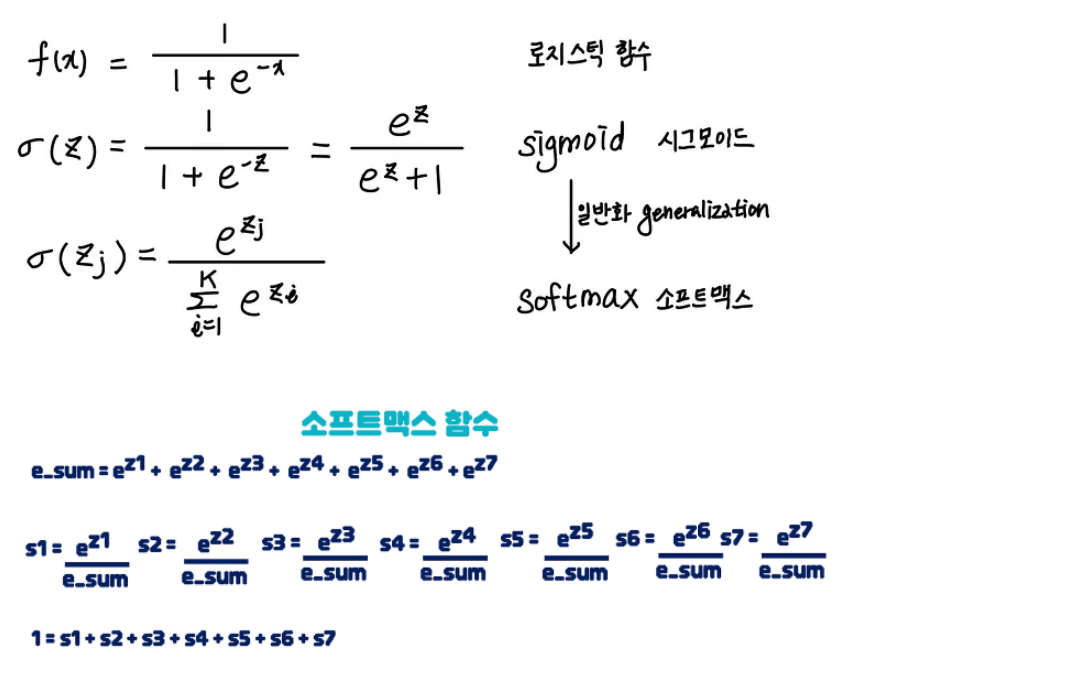

In [ ]:
# 0~4번 인덱스의 테스트 리스트에서 결과를 출력함
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1 ~ z7의 값\n")
for idx,z in enumerate(decision): # 선형방정식를 이용한 7개의 특성의 값
    print(f"{idx}번째 샘플의 z값\n{z}\n")


In [44]:
from scipy.special import softmax           # 소프트맥스를 사용하여 7개를 100%로 분류
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis=1).round(4) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki  Perch   Pike  Roach  Smelt Whitefish  예측 결과
0   0.0   1.36   84.2   0.03  13.48   0.68      0.26  Perch
1   0.0   0.26   4.41    0.0   0.74  94.59       0.0  Smelt
2   0.0    0.0    3.4  93.44   1.52   1.63       0.0   Pike
3  1.09    3.4  30.54   0.65  56.68   0.01      7.64  Roach
4   0.0   0.04  90.43   0.24   8.92   0.25      0.13  Perch
